In [2]:
import tensorflow as tf
import csv
import numpy as np

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
mnist = input_data.read_data_sets("MNIST_data", reshape=False)
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz

Image Shape: (28, 28, 1)

Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples


In [4]:
y_test.shape

(10000,)

In [5]:
y_validation.shape

(5000,)

In [6]:
X_testNew=np.concatenate((X_test,X_validation))
y_testNew=np.concatenate((y_test,y_validation))

In [7]:
import numpy as np

# Pad images with 0s
X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_testNew    = np.pad(X_testNew, ((0,0),(2,2),(2,2),(0,0)), 'constant')
print("Updated Image Shape: {}".format(X_train[0].shape))

Updated Image Shape: (32, 32, 1)


In [8]:
import matplotlib.pyplot as plt
image = X_train[1].squeeze()

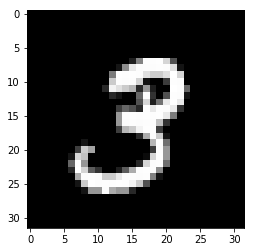

In [9]:
plt.imshow(image, cmap="gray")
plt.show()

In [10]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [11]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

In [16]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 16), mean = mu, stddev = sigma),name='conv1_W')
    conv1_b = tf.Variable(tf.zeros(16),name='conv1_b')
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 32), mean = mu, stddev = sigma),name='conv2_W')
    conv2_b = tf.Variable(tf.zeros(32),name='conv2_b')
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma),name='fc1_W')
    fc1_b = tf.Variable(tf.zeros(120),name='fc1_b')
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma),name='fc2_W')
    fc2_b  = tf.Variable(tf.zeros(84),name='fc2_b')
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 10), mean = mu, stddev = sigma),name='fc3_W')
    fc3_b  = tf.Variable(tf.zeros(10),name='fc3_b')
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    #res = Categorical(logits)
    return logits

In [17]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 10)

In [18]:

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

ValueError: Dimensions must be equal, but are 800 and 400 for 'MatMul' (op: 'MatMul') with input shapes: [?,800], [400,120].

In [ ]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    #for offset in range(0, num_examples, BATCH_SIZE):
    #    batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
    accuracy = sess.run(accuracy_operation, feed_dict={x: X_data, y:y_data})
    #    total_accuracy += (accuracy * len(batch_x))
    #return total_accuracy / num_examples
    return accuracy

In [15]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    j=0
    with open('lenet_1632.csv', 'a') as f:
        for i in range(5):
            X_train, y_train = shuffle(X_train, y_train)
            batch_x=tf.placeholder(tf.float32,shape=(128,32,32,1))
            for offset in range(0, num_examples, BATCH_SIZE):
                j+=1
                end = offset + BATCH_SIZE

                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
                
                if j%500==0:
                    training_accuracy=evaluate(X_train,y_train)
                    validation_accuracy = evaluate(X_validation, y_validation)
                    test_accuracy = evaluate(X_test, y_test)
                    whole_accuracy=evaluate(X_testNew,y_testNew)
                    print("EPOCH {} ...".format(j))
                    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                    print("Test Accuracy = {:.3f}".format(test_accuracy))
                    print("whole test Accuracy={:.3f}".format(whole_accuracy))
                    print("training Accuracy=={:.3f}".format(training_accuracy))
                    writer = csv.writer(f, delimiter=',')
                    writer.writerow([training_accuracy,validation_accuracy,test_accuracy,whole_accuracy])
                

    saver.save(sess, './lenet')
    print("Model saved")

Training...



NameError: name 'training_operation' is not defined

In [13]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\lenet.ckpt
Test Accuracy = 0.965
